In [ ]:
#Instalação das bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


Leitura dos dados

X contém o tamanho dos tumores em mílimetros
y é a variável categórica seja:

y=1 malígno
y = 0 benigno

In [ ]:
maligno = pd.DataFrame()
maligno['tamanho_tumor'] = np.random.randint(low=20 , high=50, size=20)
maligno['idade'] = np.random.randint(low = 30, high=50, size=20)
maligno ['y'] = 1

In [ ]:
benigno = pd.DataFrame()
benigno['tamanho_tumor'] = np.random.randint(low=20 , high=35, size=20)
benigno['idade'] = np.random.randint(low = 15, high=35, size=20)
benigno ['y'] = 0

In [ ]:
df = pd.concat([maligno, benigno], axis=0)

In [ ]:
df.head()

,tamanho_tumor,idade,y
0,43,31,1
1,46,35,1
2,39,32,1
3,28,47,1
4,20,32,1


In [ ]:
df.describe()

,tamanho_tumor,idade,y
count,40.000000,40.000000,40.00000
mean,29.225000,31.350000,0.50000
std,8.959989,10.214494,0.50637
min,20.000000,15.000000,0.00000
25%,23.000000,24.750000,0.00000
50%,26.000000,31.000000,0.50000
75%,33.250000,39.250000,1.00000
max,49.000000,49.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tamanho_tumor  40 non-null     int64
 1   idade          40 non-null     int64
 2   y              40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


Visualização de dados

In [ ]:
maligno = df[df['y']==1]
benigno = df[df['y']==0]

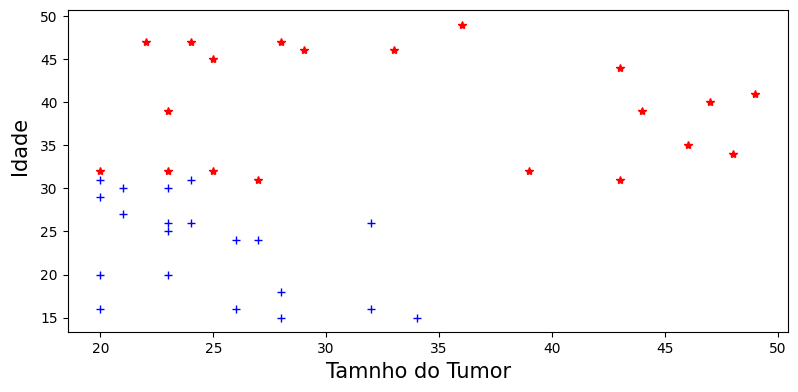

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(benigno['tamanho_tumor'], benigno['idade'], '+b')
ax.plot(maligno['tamanho_tumor'], maligno['idade'], '*r')
plt.text(30,8, 'Tamnho do Tumor', fontdict = {'size': 15})
plt.text(16,32, 'Idade', fontdict = {'size': 15}, rotation = 90)
plt.tight_layout()




Criando um modelo



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df[['tamanho_tumor', 'idade']]
y = df['y']

In [ ]:
X

,tamanho_tumor,idade
0,43,31
1,46,35
2,39,32
3,28,47
4,20,32
5,27,31
6,47,40
7,29,46
8,24,47
9,36,49


In [ ]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: y, dtype: int64

In [ ]:
model = LogisticRegression()

Treinando o modelo

In [ ]:
model.fit(X, y)

LogisticRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[[0.31643074 1.31256298]]
[-48.15857639]


In [ ]:
 ỹ = model.predict(X)

Avaliando os resultados

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y, ỹ )

0.975

In [ ]:
#matriz de confusão
metrics.confusion_matrix(y, ỹ)

array([[19,  1],
       [ 0, 20]])

In [ ]:
#acúracia
metrics.precision_score(y, ỹ)

0.9523809523809523

In [ ]:
##recall
metrics.recall_score(y, ỹ)

1.0

In [ ]:
#f1 - score
metrics.f1_score(y, ỹ)

0.975609756097561

Relatório de classificação

In [ ]:
print(classification_report(y, ỹ))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

